In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Load the data from the Excel file
file_path = 'Data/Mutate_Rate.xlsx'
df = pd.read_excel(file_path)

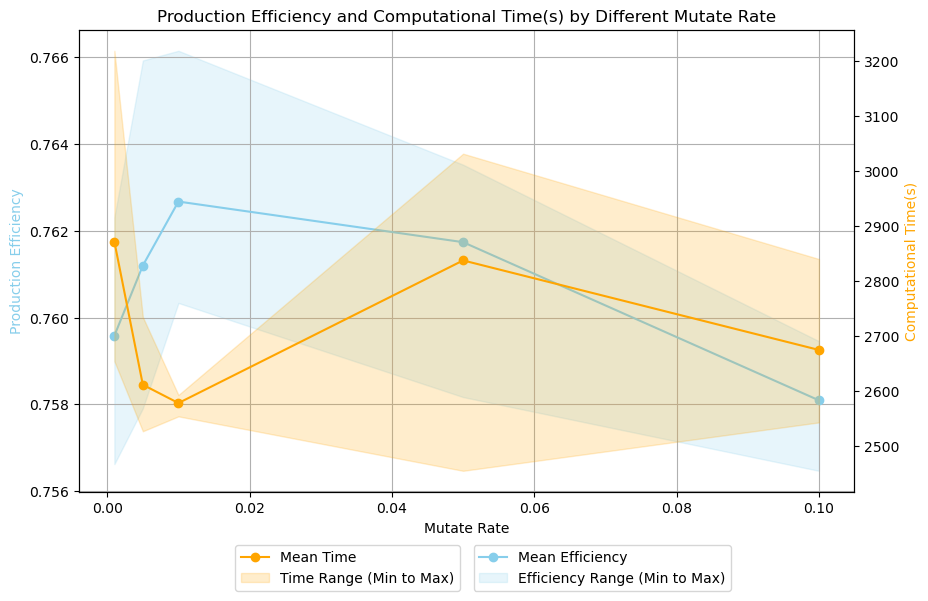

In [13]:
# Assuming the data structure in the file has columns like 'Cross Rate', 'Production Efficiency', 'Time Period'
# Group by 'Cross Rate' and calculate the statistics for each group
grouped = df.groupby('Mutate Rate').agg({
    'Production Efficiency': ['min', 'max', 'mean'],
    'Time Period': ['min', 'max', 'mean']
}).reset_index()

# Flatten the MultiIndex columns
grouped.columns = ['Mutate Rate', 'PE_min', 'PE_max', 'PE_mean', 'TP_min', 'TP_max', 'TP_mean']

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Production Efficiency mean and range in blue
ax1.plot(grouped['Mutate Rate'], grouped['PE_mean'], label='Mean Efficiency', color='skyblue', marker='o')
ax1.fill_between(grouped['Mutate Rate'], grouped['PE_min'], grouped['PE_max'], color='skyblue', alpha=0.2, label='Efficiency Range (Min to Max)')

# Plot Time Period mean and range in orange
ax2 = ax1.twinx()
ax2.plot(grouped['Mutate Rate'], grouped['TP_mean'], label='Mean Time', color='orange', marker='o')
ax2.fill_between(grouped['Mutate Rate'], grouped['TP_min'], grouped['TP_max'], color='orange', alpha=0.2, label='Time Range (Min to Max)')

# Adding labels and titles
ax1.set_xlabel('Mutate Rate')
ax1.set_ylabel('Production Efficiency', color='skyblue')
ax2.set_ylabel('Computational Time(s)', color='orange')
plt.title('Production Efficiency and Computational Time(s) by Different Mutate Rate')

# Show grid and legends
ax1.grid(True)
ax1.legend(loc='upper left', bbox_to_anchor=(0.5, -0.1))
ax2.legend(loc='upper right', bbox_to_anchor=(0.5, -0.1))

plt.show()